In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Distribución de edades')

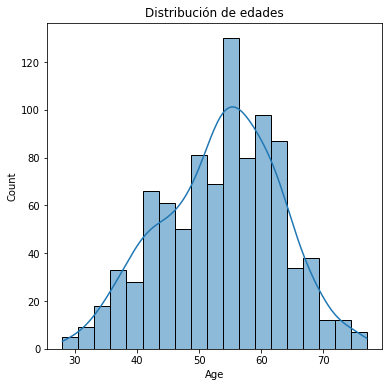

In [8]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribución de edades')

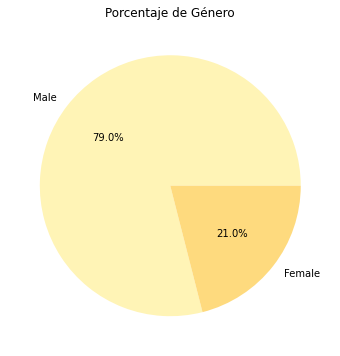

In [9]:
plt.figure(figsize=(6,6))
plt.pie(df['Sex'].value_counts(),labels=['Male','Female'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.title('Porcentaje de Género')
plt.show()

- En este grafico vemos que hay un porcentaje alto de hombres respecto a de las mujeres.

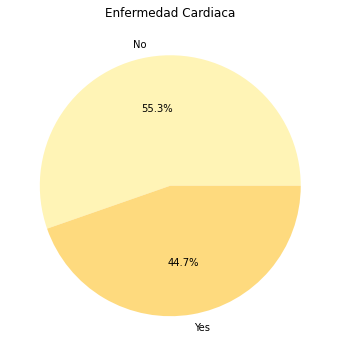

In [10]:
plt.figure(figsize=(6,6))
plt.pie(df['HeartDisease'].value_counts(),labels=['No','Yes'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.title('Enfermedad Cardiaca')
plt.show()

- Porcentaje balanceado respecto a la enfermedad cardiaca.

Distribución de genero y edad respecto a la enfermedad cardiaca

<AxesSubplot:xlabel='Age', ylabel='Count'>

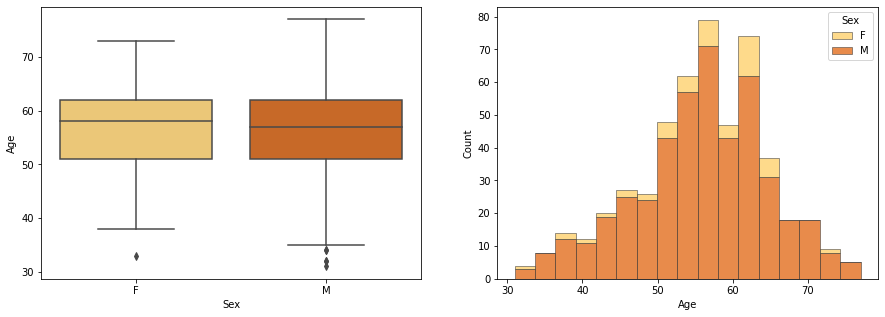

In [11]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Sex", y = "Age", palette = "YlOrBr", data=df[df['HeartDisease'] == 1] , ax = ax[0])
sns.histplot(data=df[df['HeartDisease'] == 1], x='Age', hue='Sex', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

- Aca vemos que en promedio las personas entre 50 y 60 años tiene la posibilidad de poseer enfermedades cardiacas, tanto hombres como mujeres.

Relación de tipo de dolor toracico y género respecto a enfermedades cardíacas.

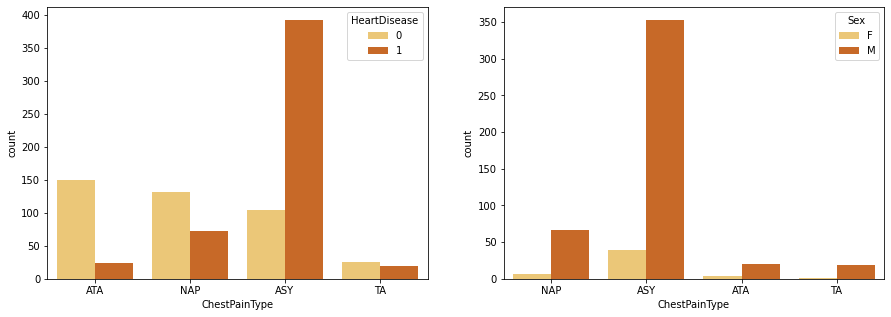

In [12]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'ChestPainType', hue = 'HeartDisease', palette = "YlOrBr", data = df, ax = ax[0])
sns.countplot(x = 'ChestPainType', hue = 'Sex', palette = "YlOrBr", data = df[df['HeartDisease'] == 1])
plt.show()

- Aquí vemos que a los pacientes que son asintomáticos puede llegar a afectar mas las enfermedades cardíacas.
- En especial a los hombres.

Distribución de presión arterial (mm Hg)

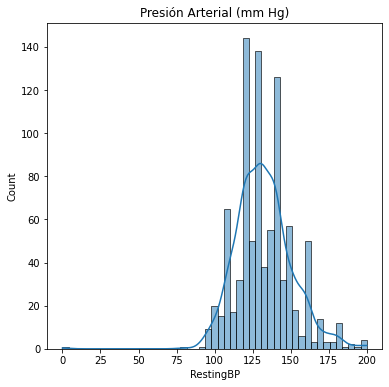

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='RestingBP', kde=True)
plt.title('Presión Arterial (mm Hg)')
plt.show()

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

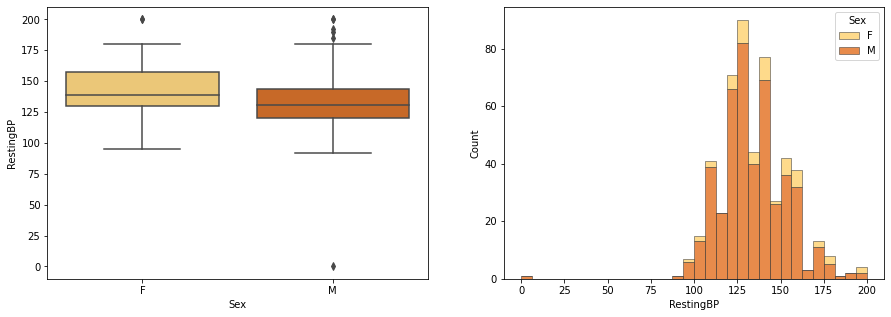

In [14]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Sex", y = "RestingBP", palette = "YlOrBr", data=df[df['HeartDisease'] == 1] , ax = ax[0])
sns.histplot(data=df[df['HeartDisease'] == 1], x='RestingBP', hue='Sex', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

- Los números de presión arterial inferiores a 120/80 mm Hg se consideran dentro de la categoría normal.
- La presión arterial es elevada cuando los valores de las lecturas se encuentran, de forma habitual, entre 120 y 129 mm Hg en el caso de la sistólica y por debajo de 80 mm Hg en el de la diastólica.
- La hipertensión en fase 1 es cuando la presión arterial sistólica varía, con regularidad, de 130 a 139 mm Hg y la diastólica de 80 a 89 mm Hg.
- En la hipertensión en fase 2, la presión arterial se encuentra de forma regular en rangos de 140/90 mm Hg o superiores.
- Si las lecturas de presión arterial de repente superan los valores de 180/120 mm Hg, esta fase de hipertensión arterial requiere atención médica.
- En los gráficos vemos que llegando a una presión elevada (130/160 mm Hg) en mujeres, y en hombres (125/140 mm hg) tienen la posibilidad de sufrir una enfermedad cardíaca.

Distribución del colesterol sérico [mm/dl]

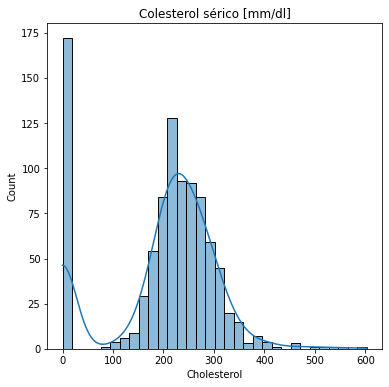

In [15]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='Cholesterol', kde=True)
plt.title('Colesterol sérico [mm/dl]')
plt.show()

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

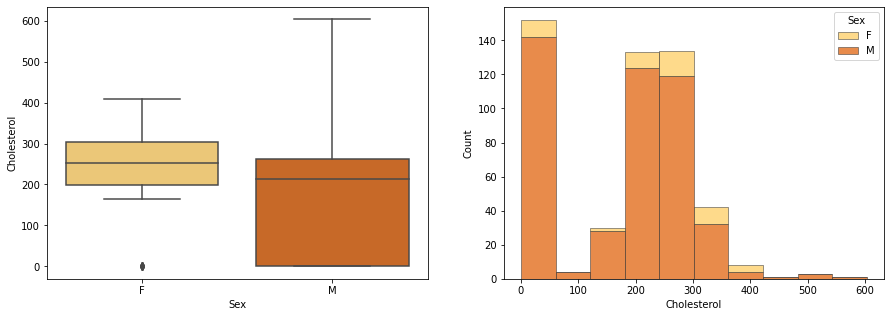

In [16]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Sex", y = "Cholesterol", palette = "YlOrBr", data=df[df['HeartDisease'] == 1] , ax = ax[0])
sns.histplot(data=df[df['HeartDisease'] == 1], x='Cholesterol', hue='Sex', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

Azúcar en Sangre

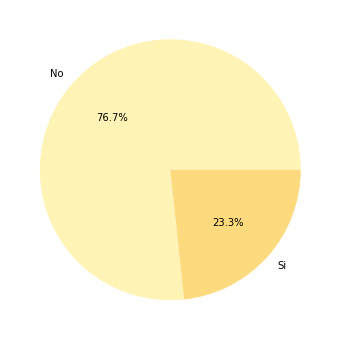

In [17]:
plt.figure(figsize=(6,6))
plt.pie(df['FastingBS'].value_counts(),labels=['No','Si'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

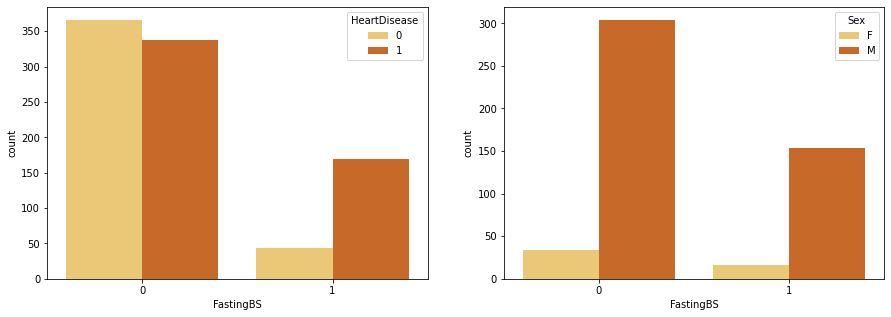

In [18]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'FastingBS', hue = 'HeartDisease', palette = "YlOrBr", data = df, ax = ax[0])
sns.countplot(x = 'FastingBS', hue = 'Sex', palette = "YlOrBr", data = df[df['HeartDisease'] == 1])
plt.show()

Electrocardiograma en reposo

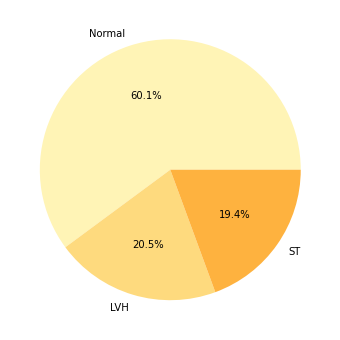

In [19]:
plt.figure(figsize=(6,6))
plt.pie(df['RestingECG'].value_counts(),labels=['Normal','LVH','ST'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

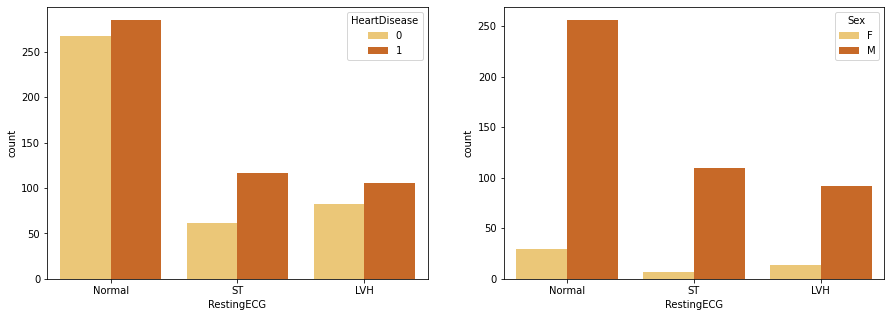

In [20]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'RestingECG', hue = 'HeartDisease', palette = "YlOrBr", data = df, ax = ax[0])
sns.countplot(x = 'RestingECG', hue = 'Sex', palette = "YlOrBr", data = df[df['HeartDisease'] == 1])
plt.show()

Frecuencia cardiaca maxima alcanzada

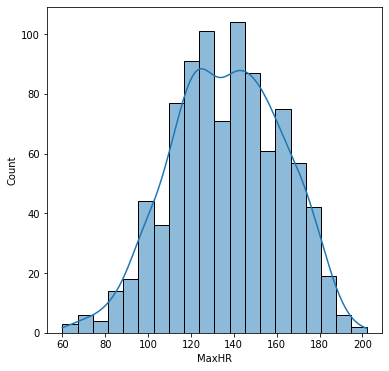

In [21]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='MaxHR', kde=True)
plt.show()

-Normalmente, el corazón late entre 60 y 100 veces por minuto. En las personas que hacen ejercicio habitualmente o que toman medicamentos para reducir el ritmo cardíaco, la frecuencia puede caer por debajo de 60 latidos por minuto.

-Si su frecuencia cardíaca es rápida (más de 100 latidos por minuto), se denomina taquicardia. Una frecuencia cardíaca de menos de 60 se denomina bradicardia. Un latido cardíaco adicional fuera de ritmo se conoce como extrasístole.

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

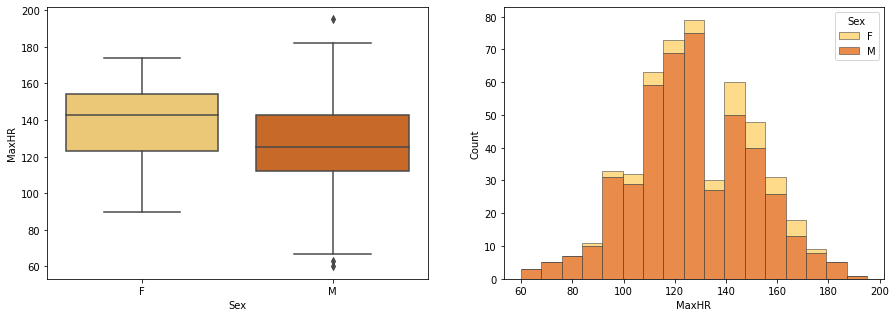

In [22]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Sex", y = "MaxHR", palette = "YlOrBr", data=df[df['HeartDisease'] == 1] , ax = ax[0])
sns.histplot(data=df[df['HeartDisease'] == 1], x='MaxHR', hue='Sex', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

- Hombre: Probabilidad de sufrir una enfermedad cardiaca si su frecuencia cardiaca oscila entre los 110 a 150.
- Mujer: Probabilidad de sufrir una enfermedad cardiaca si su frecuencia cardiaca oscila entre los 130 a 155.

Angina Inducida por el ejercicio

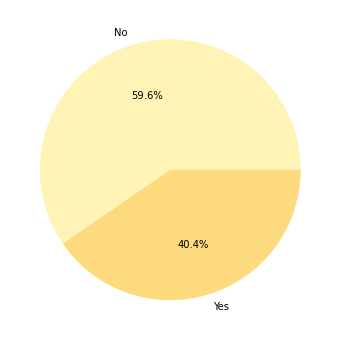

In [23]:
plt.figure(figsize=(6,6))
plt.pie(df['ExerciseAngina'].value_counts(),labels=['No','Yes'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

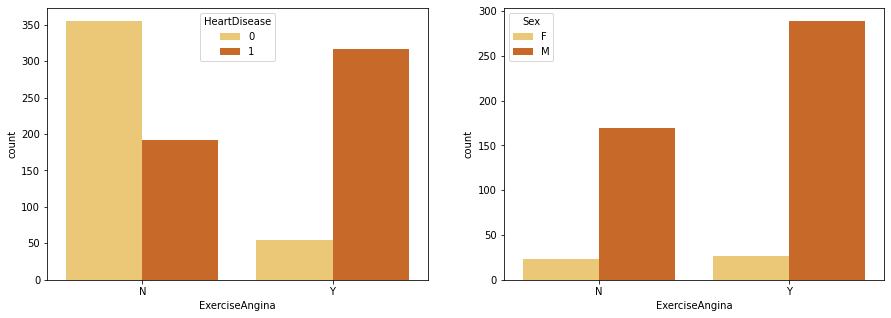

In [24]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'ExerciseAngina', hue = 'HeartDisease', palette = "YlOrBr", data = df, ax = ax[0])
sns.countplot(x = 'ExerciseAngina', hue = 'Sex', palette = "YlOrBr", data = df[df['HeartDisease'] == 1])
plt.show()

Valor númerico medido de depresión

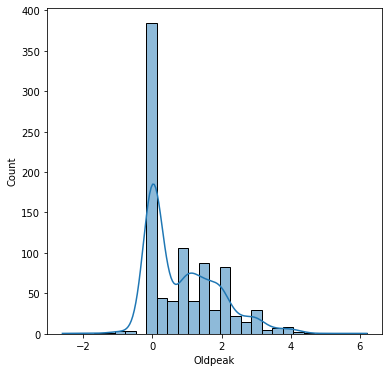

In [25]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='Oldpeak', kde=True)
plt.show()

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

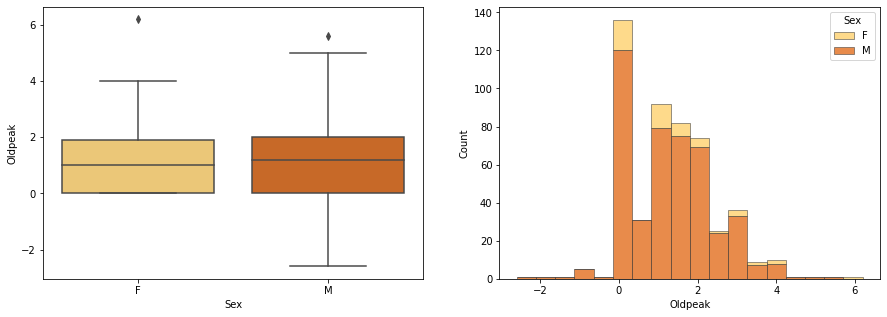

In [26]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Sex", y = "Oldpeak", palette = "YlOrBr", data=df[df['HeartDisease'] == 1] , ax = ax[0])
sns.histplot(data=df[df['HeartDisease'] == 1], x='Oldpeak', hue='Sex', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

ST Slope

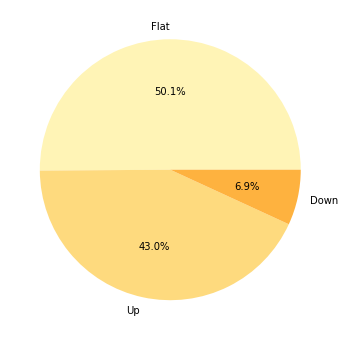

In [27]:
plt.figure(figsize=(6,6))
plt.pie(df['ST_Slope'].value_counts(),labels=['Flat','Up','Down'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

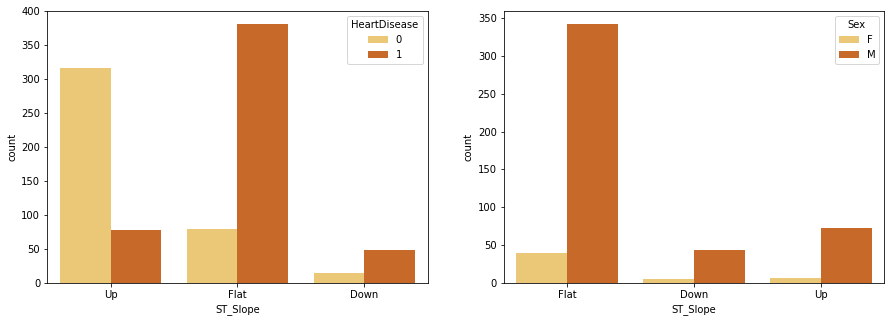

In [28]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'ST_Slope', hue = 'HeartDisease', palette = "YlOrBr", data = df, ax = ax[0])
sns.countplot(x = 'ST_Slope', hue = 'Sex', palette = "YlOrBr", data = df[df['HeartDisease'] == 1])
plt.show()

Mapa de correlación

In [29]:
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

<AxesSubplot:>

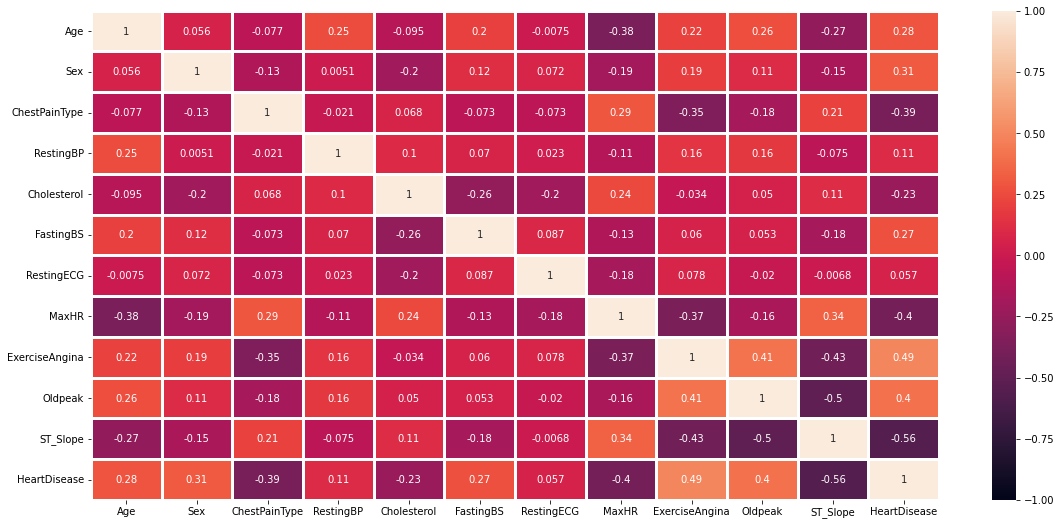

In [30]:
plt.figure(figsize=(19,9))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, linewidths = 3)

In [31]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

Normalización de datos

In [32]:
sc = StandardScaler()
x = sc.fit_transform(X)

Separación de datos

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [34]:
print(f'Shape of training data : {x_train.shape}, {y_train.shape}')
print(f'Shape of testing data : {x_test.shape}, {y_test.shape}')

Shape of training data : (734, 11), (734,)
Shape of testing data : (184, 11), (184,)


Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [36]:
lr_conf = confusion_matrix(y_test, lr_pred)
print(f'\nConfusion Matrix : \n\n{lr_conf}')


Confusion Matrix : 

[[72 17]
 [12 83]]


In [37]:
lr_report = classification_report(y_test, lr_pred)
print(f'\nClassification Report: \n\n{lr_report}')


Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        89
           1       0.83      0.87      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [38]:
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f'\nThe accuracy of Logistic Regression is {lr_acc} %')


The accuracy of Logistic Regression is 84.24 %


Random Forest

In [39]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

In [40]:
rfc_conf = confusion_matrix(y_test, rfc_pred)
print(f'\nConfusion Matrix : \n\n{rfc_conf}')


Confusion Matrix : 

[[72 17]
 [10 85]]


In [41]:
rfc_report = classification_report(y_test, rfc_pred)
print(f'\nClasification Report: \n\n{rfc_report}')


Clasification Report: 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [42]:
rfc_eval = cross_val_score(estimator=rfc, X = x_train, y = y_train, cv = 10)

In [43]:
rfc_eval

array([0.85135135, 0.86486486, 0.87837838, 0.89189189, 0.94520548,
       0.79452055, 0.87671233, 0.78082192, 0.83561644, 0.91780822])

In [44]:
rfc_eval.mean()

0.8637171417993337

In [45]:
rfc_acc = round(accuracy_score(y_test, rfc_pred)*100, ndigits = 2)
print(f"\nThe Accuracy of Random Forest Classifier is {rfc_acc} %")


The Accuracy of Random Forest Classifier is 85.33 %


Kneigbors Classifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [47]:
knn_conf = confusion_matrix(y_test, knn_pred)
print(f"Confusion Matrix : \n\n{knn_conf}")

Confusion Matrix : 

[[78 11]
 [12 83]]


In [48]:
knn_report = classification_report(y_test, knn_pred)
print(f"Classification report : \n\n{knn_report}")

Classification report : 

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        89
           1       0.88      0.87      0.88        95

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [49]:
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"\n The accuracy of Kneigbors Classifier is {knn_acc} %")


 The accuracy of Kneigbors Classifier is 87.5 %


Extreme Gradient Boosting Classifier

In [50]:
xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

C:\Users\ale_d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [51]:
xgb_conf = confusion_matrix(y_test, xgb_pred)
print(f"Confusion Matrix : \n\n{xgb_conf}")

Confusion Matrix : 

[[72 17]
 [11 84]]


In [52]:
xgb_report = classification_report(y_test, xgb_pred)
print(f"Classification report : \n\n{xgb_report}")

Classification report : 

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        89
           1       0.83      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [53]:
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")


The Accuracy of Extreme Gradient Boosting Classifier is 84.78 %


Support Vector Machine

In [54]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

In [55]:
svc_conf = confusion_matrix(y_test, pred_svc)
print(f"Confusion Matrix : \n\n{svc_conf}")

Confusion Matrix : 

[[72 17]
 [12 83]]


In [56]:
svc_report = classification_report(y_test, pred_svc)
print(f"\nClassification Report : \n\n{svc_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        89
           1       0.83      0.87      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [57]:
svc_acc = round(accuracy_score(y_test, pred_svc)*100, ndigits = 2)
print(f"\nThe Accuracy of Support Vector Machine is {svc_acc} %")


The Accuracy of Support Vector Machine is 84.24 %


Grid Search CV

In [58]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

In [59]:
grid_svc = GridSearchCV(svc, param_grid = param, scoring='accuracy', cv=10)

In [60]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [61]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.1, 'kernel': 'rbf'}

In [62]:
grid_svc2 = SVC(C=1.2, gamma = 0.1, kernel = 'rbf')

In [63]:
grid_svc2.fit(x_train, y_train)
pred_grid_svc2 = grid_svc.predict(x_test)

In [64]:
grid_svc2_conf = confusion_matrix(y_test,pred_grid_svc2)
print(f"Confusion Matrix : \n\n{grid_svc2_conf}")

Confusion Matrix : 

[[72 17]
 [11 84]]


In [65]:
grid_svc2_report = classification_report(y_test, pred_grid_svc2)
print(f"\nClassification Report : \n\n{grid_svc2_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        89
           1       0.83      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [66]:
grid_svc2_acc = round(accuracy_score(y_test,pred_grid_svc2)*100,ndigits=2)
print(f"\nThe Accuracy of Gaussian Naive Bayes is {grid_svc2_acc} %")


The Accuracy of Gaussian Naive Bayes is 84.78 %


Gaussian NB

In [67]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

In [68]:
gnb_conf = confusion_matrix(y_test,gnb_pred)
print(f"Confusion Matrix : \n\n{gnb_conf}")

Confusion Matrix : 

[[73 16]
 [11 84]]


In [69]:
gnb_report = classification_report(y_test, gnb_pred)
print(f"\nClassification Report : \n\n{gnb_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        89
           1       0.84      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [70]:
gnb_acc = round(accuracy_score(y_test,gnb_pred)*100,ndigits=2)
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")


The Accuracy of Gaussian Naive Bayes is 85.33 %


Stochastic Gradient Descent

In [71]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

In [72]:
sgd_conf = confusion_matrix(y_test, xgb_pred)
print(f"Confusion Matrix : \n\n{sgd_conf}")

Confusion Matrix : 

[[72 17]
 [11 84]]


In [73]:
sgd_report = classification_report(y_test, xgb_pred)
print(f"\nClassification Report : \n\n{sgd_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        89
           1       0.83      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [74]:
sgd_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"\nThe Accuracy of Stochastic Gradient Descent is {sgd_acc} %")


The Accuracy of Stochastic Gradient Descent is 84.78 %


Decision Tree Classifier

In [75]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

In [76]:
clf_conf = confusion_matrix(y_test, pred_clf)
print(f"Confusion Matrix : \n\n{clf_conf}")

Confusion Matrix : 

[[68 21]
 [24 71]]


In [77]:
clf_report = classification_report(y_test, pred_clf)
print(f"\nClassification Report : \n\n{clf_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        89
           1       0.77      0.75      0.76        95

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



In [78]:
clf_acc = round(accuracy_score(y_test, pred_clf)*100, ndigits = 2)
print(f"\nThe Accuracy of Decision Tree Classifier is {clf_acc} %")


The Accuracy of Decision Tree Classifier is 75.54 %


In [79]:
accuracy_list = []

In [80]:
model_acc = ['lr_acc','rfc_acc','knn_acc','xgb_acc','svc_acc','grid_svc2_acc','gnb_acc','sgd_acc','clf_acc']

In [81]:
model_list = ['LogisticRegression' , 'RandomForestClassifier' , 'KNeighborsClassifier' ,'XGBClassifier','SVC','GridSearchCV','GaussianNB','SGDClassifier','DecisionTreeClassifier']

In [82]:
accuracy_list.append(lr_acc)
accuracy_list.append(rfc_acc)
accuracy_list.append(knn_acc)
accuracy_list.append(xgb_acc)
accuracy_list.append(svc_acc)
accuracy_list.append(grid_svc2_acc)
accuracy_list.append(gnb_acc)
accuracy_list.append(sgd_acc)
accuracy_list.append(clf_acc)


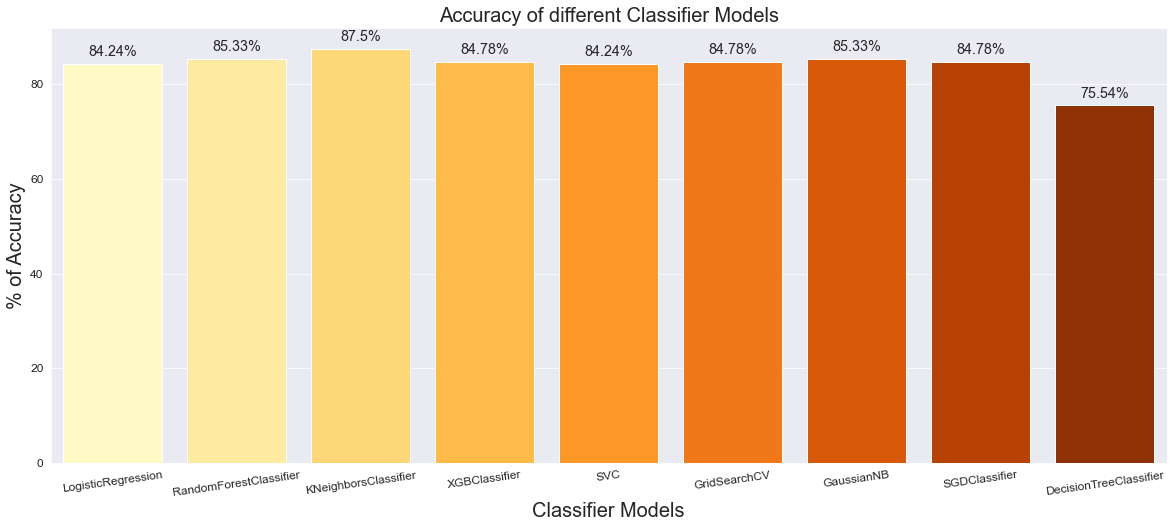

In [83]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "YlOrBr", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()